<a href="https://colab.research.google.com/github/DUSSASURAJ/AIML-46/blob/main/lab_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
file_path = '/content/drive/MyDrive/HR analytics.csv'
df = pd.read_csv('/content/drive/MyDrive/HR analytics.csv')


In [13]:
attrition_counts = df['Attrition'].value_counts()
print("Attrition counts:\n", attrition_counts)


Attrition counts:
 Attrition
No     1242
Yes     238
Name: count, dtype: int64


In [14]:
labels = attrition_counts.index
sizes = attrition_counts.values
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)

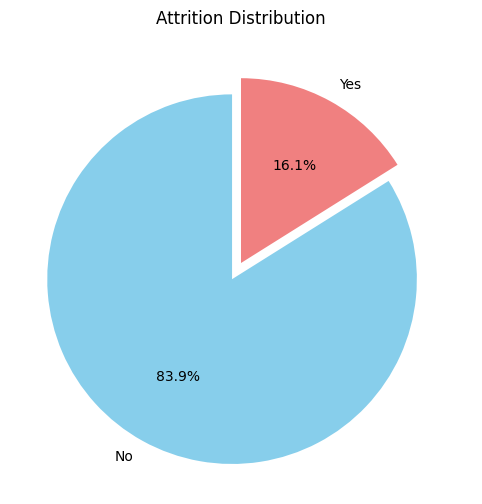

In [15]:
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Attrition Distribution')
plt.show()

<ipython-input-16-900c63ce466d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='JobSatisfaction', data=df, palette='pastel')


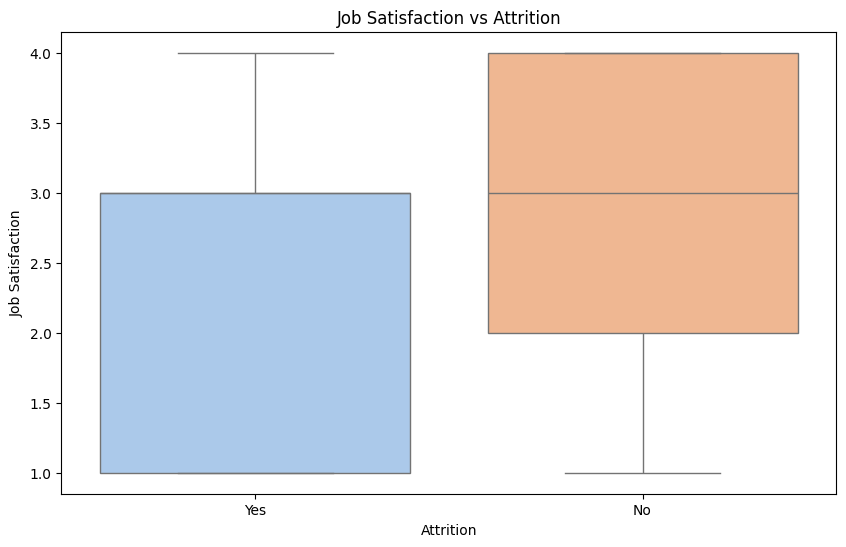

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df, palette='pastel')
plt.title('Job Satisfaction vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Job Satisfaction')
plt.show()

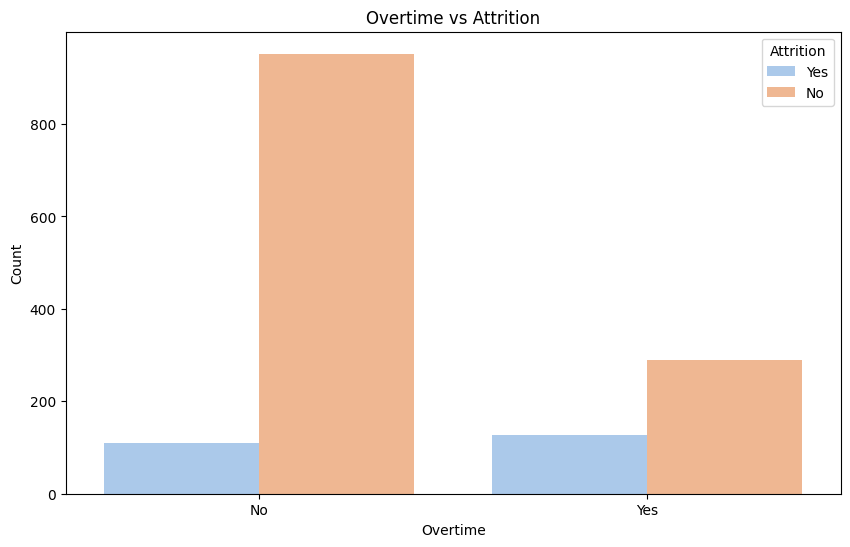

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='OverTime', hue='Attrition', data=df, palette='pastel')
plt.title('Overtime vs Attrition')
plt.xlabel('Overtime')
plt.ylabel('Count')
plt.show()

In [18]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])


Missing values:
 YearsWithCurrManager    57
dtype: int64


In [19]:
numeric_columns = ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
                   'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                   'MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating',
                   'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
                   'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
                   'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [20]:
X = df[['JobSatisfaction', 'OverTime']]
X = pd.get_dummies(X, drop_first=True)
y = df['Attrition'].map({'Yes': 1, 'No': 0})


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")


F1 Score: 0.0
